## Introduction

- In this notebook, I learn to deal with marketing dataset. My goal is to extract insight through data exploration focusing on marketing metrics
- I'm using this dataset  https://archive.ics.uci.edu/dataset/222/bank+marketing for the case.

These variables are going to be the main focus to calculate customer engagement:
  
  1. `contact`:
    - Represents the contact communication type, such as cellular, telephone, or unknown. It captures the method of contact made by the bank to engage with customers.
  
  2. `month`:
    - Indicates the month of the last contact with the customer. It provides information on the timing of the engagement.
  
  3. `day_of_week`:
    - Represents the day of the week of the last contact. It offers insights into the specific days when customers were engaged.

## Import Libraries and Data

In [1]:
import numpy as np
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


| Variable Name   | Role    | Type         | Demographic      | Description                                                                                                                                                                    | Units | Missing Values |
|-----------------|---------|--------------|------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------|----------------|
| age             | Feature | Integer      | Age              | Age                                                                                                                                                                            |       | no             |
| job             | Feature | Categorical  | Occupation       | type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')   |       | no             |
| marital         | Feature | Categorical  | Marital Status   | marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)                                                             |       | no             |
| education       | Feature | Categorical  | Education Level  | (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')                                                 |       | no             |
| default         | Feature | Binary       |                  | has credit in default?                                                                                                                                                        |       | no             |
| balance         | Feature | Integer      |                  | average yearly balance                                                                                                                                                        | euros | no             |
| housing         | Feature | Binary       |                  | has housing loan?                                                                                                                                                             |       | yes            |
| loan            | Feature | Binary       |                  | has personal loan?                                                                                                                                                            |       | no             |
| contact         | Feature | Categorical  |                  | contact communication type (categorical: 'cellular','telephone')                                                                                                              |       | yes            |
| day_of_week     | Feature | Date         |                  | last contact day of the week                                                                                                                                                   |       | no             |
| month           | Feature | Date         |                  | last contact month of year (categorical: 'jan','feb','mar',...,'nov','dec')                                                                                                    |       | no             |
| duration        | Feature | Integer      |                  | last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. |       | no             |
| campaign        | Feature | Integer      |                  | number of contacts performed during this campaign and for this client (numeric, includes last contact)                                                                         |       | no             |
| pdays           | Feature | Integer      |                  | number of days that passed by after the client was last contacted from a previous campaign (numeric: -1 means client was not previously contacted)                             |       | yes            |
| previous        | Feature | Integer      |                  | number of contacts performed before this campaign and for this client                                                                                                          |       | no             |
| poutcome        | Feature | Categorical  |                  | outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')                                                                                   |       | yes            |
| y               | Target  | Binary       |                  | has the client subscribed a term deposit?                                                                                                                                      |       | no             |


# 1. Data Cleaning and Pre-processing

## Check for duplicates

In [3]:
print('Total rows:', len(df))

Total rows: 41188


In [4]:
df.duplicated().sum()

12

I wanna check if there is a same customer that duplicated on the dataset, cause there is no `id's` on the dataset.

In [5]:
df.duplicated(subset= ["age", "job" ,"marital", "education", "housing", "loan"]).sum()

30719

In [15]:
len(df)

41188

There is a lot of duplicated data here. Why are they duplicated? Is it an error or could there be other explanation?

In [6]:
df[df.duplicated(subset= ["age", "job" ,"marital", "education", "housing", "loan"])].head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
10,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
11,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
16,35,blue-collar,married,basic.6y,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
31,59,technician,married,unknown,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
86,41,management,married,basic.6y,no,no,no,telephone,may,mon,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
# Take one value combination and take a peek at the data

filtered_df = df[(df["age"]==41) &
                 (df["job"]== "blue-collar") &
                 (df["marital"]== "married") &
                 (df["education"]== "unknown") &
                 (df["housing"]== "no") &
                 (df["loan"]== "no")]

# Dropping the filtered columns to show only the remaining ones
result_df = filtered_df.drop(columns=["age", "job", "marital", "education", "housing", "loan"])
result_df

,default,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
7,unknown,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
10,unknown,telephone,may,mon,55,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8005,no,telephone,jun,mon,424,2,999,0,nonexistent,1.4,94.465,-41.8,4.865,5228.1,no
12180,no,telephone,jul,tue,529,1,999,0,nonexistent,1.4,93.918,-42.7,4.955,5228.1,no
12533,no,cellular,jul,mon,226,1,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no
12959,no,cellular,jul,tue,89,1,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
14891,unknown,cellular,jul,wed,516,4,999,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1,no
29174,unknown,cellular,apr,fri,203,1,999,1,failure,-1.8,93.075,-47.1,1.405,5099.1,no


If you look at the table, the same data has different days, durations, months, and campaigns. So, there seems to be no duplicates that would harm the analyses.

## Check unique values

In [8]:
print(df["contact"].value_counts())

contact
cellular     26144
telephone    15044
Name: count, dtype: int64


In [9]:
print(df["month"].value_counts())

month
may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: count, dtype: int64


In [10]:
print(df["day_of_week"].value_counts())

day_of_week
thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: count, dtype: int64


## Check missing value

In [11]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## Checking for outliers

Here, I take the case that marketing needs to check if we need to exclude outliers based on age.  
So i will do exploration on the distribution of `age` column.

In [12]:
df["age"].describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

In [13]:
# Get the average value
print("average : ", np.mean(df["age"]))

# Get the 5th, 50th, and 95th percentile value
print("5th percentile : ", np.percentile(df["age"], 5))
print("50th percentile : ", np.percentile(df["age"], 50))
print("95th percentile : ", np.percentile(df["age"], 95))

average :  40.02406040594348
5th percentile :  26.0
50th percentile :  38.0
95th percentile :  58.0


There is two ways to visualize distribution of `age` column: Histogram and Box Plot 

c:\Users\vince\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


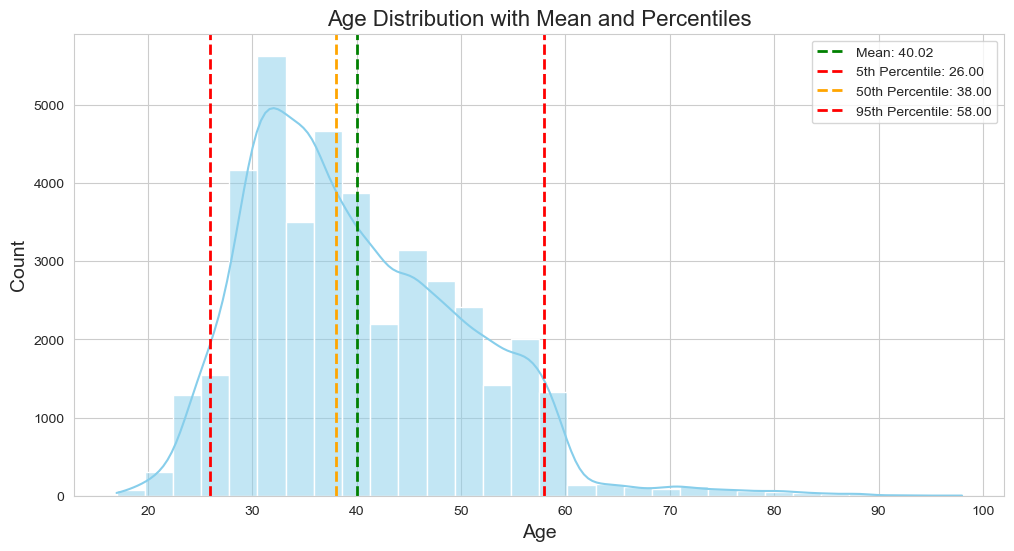

In [14]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(12, 6))

# Create a histogram for the `age` column
sns.histplot(data=df, x="age", bins=30, kde=True, ax=ax, color='skyblue')

# Add vertical lines for mean and percentiles
mean_age = np.mean(df["age"])
percentiles = np.percentile(df["age"], [5, 50, 95])

# Plotting mean
ax.axvline(x=mean_age, color="green", linestyle="--", lw=2, label=f'Mean: {mean_age:.2f}')

# Plotting percentiles
colors = ['red', 'orange', 'red']
percentile_labels = ['5th Percentile', '50th Percentile', '95th Percentile']
for perc, color, label in zip(percentiles, colors, percentile_labels):
    ax.axvline(x=perc, color=color, linestyle="--", lw=2, label=f'{label}: {perc:.2f}')

# Adding titles and labels
ax.set_title('Age Distribution with Mean and Percentiles', fontsize=16)
ax.set_xlabel('Age', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# Adding a legend
ax.legend()

# Show the plot
plt.show()

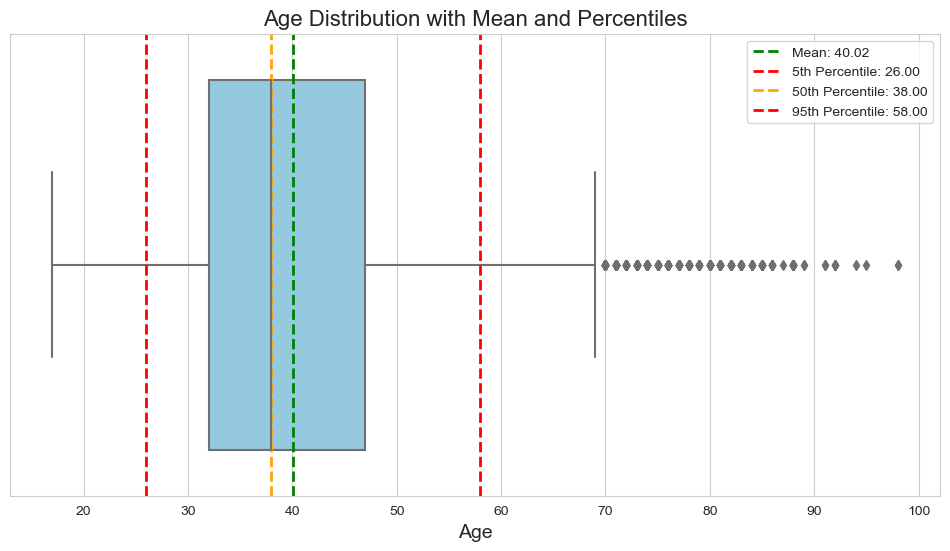

In [15]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(12, 6))

# Create a box plot for the `age` column
sns.boxplot(x=df["age"], ax=ax, color='skyblue')

# Add vertical lines for mean and percentiles
mean_age = np.mean(df["age"])
percentiles = np.percentile(df["age"], [5, 50, 95])

# Plotting mean
ax.axvline(x=mean_age, color="green", linestyle="--", lw=2, label=f'Mean: {mean_age:.2f}')

# Plotting percentiles
colors = ['red', 'orange', 'red']
percentile_labels = ['5th Percentile', '50th Percentile', '95th Percentile']
for perc, color, label in zip(percentiles, colors, percentile_labels):
    ax.axvline(x=perc, color=color, linestyle="--", lw=2, label=f'{label}: {perc:.2f}')

# Adding titles and labels
ax.set_title('Age Distribution with Mean and Percentiles', fontsize=16)
ax.set_xlabel('Age', fontsize=14)

# Adding a legend
ax.legend()

# Show the plot
plt.show()

c:\Users\vince\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


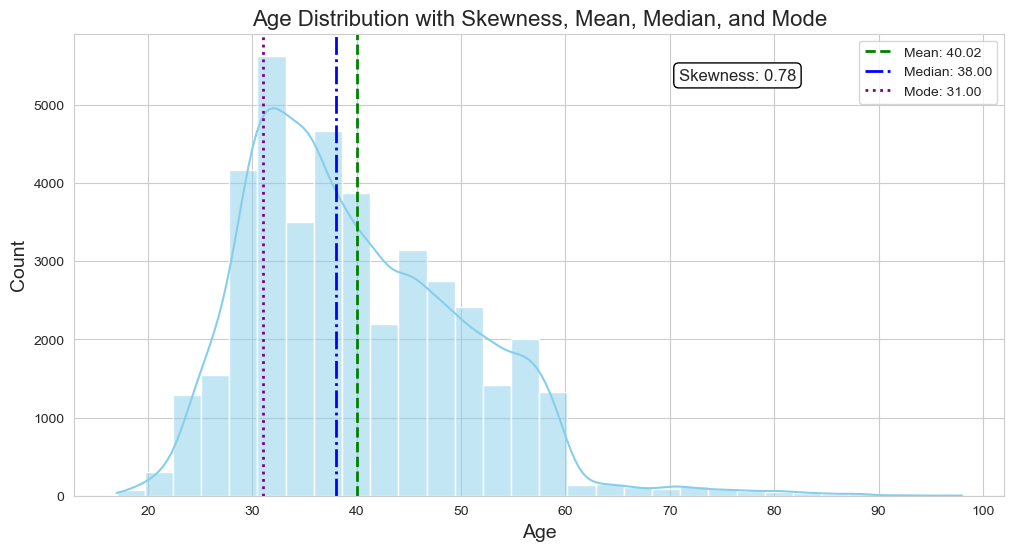

In [17]:
# Calculate skewness
age_skewness = skew(df["age"].dropna())

# Calculate mean, median, and mode
mean_age = np.mean(df["age"])
median_age = np.median(df["age"])
mode_age = df["age"].mode()[0]  # mode() returns a series, get the first value

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(12, 6))

# Create a histogram for the `age` column with KDE
sns.histplot(data=df, x="age", bins=30, kde=True, ax=ax, color='skyblue')

# Add vertical lines for mean and percentiles
percentiles = np.percentile(df["age"], [5, 50, 95])

# Plotting mean
ax.axvline(x=mean_age, color="green", linestyle="--", lw=2, label=f'Mean: {mean_age:.2f}')

# Plotting median
ax.axvline(x=median_age, color="blue", linestyle="-.", lw=2, label=f'Median: {median_age:.2f}')

# Plotting mode
ax.axvline(x=mode_age, color="purple", linestyle=":", lw=2, label=f'Mode: {mode_age:.2f}')

# Adding titles and labels
ax.set_title('Age Distribution with Skewness, Mean, Median, and Mode', fontsize=16)
ax.set_xlabel('Age', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# Adding skewness value annotation
ax.annotate(f'Skewness: {age_skewness:.2f}', xy=(0.65, 0.9), xycoords='axes fraction', fontsize=12,
            bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))

# Adding a legend
ax.legend()

# Show the plot
plt.show()

Understanding Skewness:
  1. Positive Skewness: When skewness is greater than 0, the distribution is positively skewed (right-skewed). This means the right tail (higher values) is longer or fatter than the left tail (lower values).
  2. Negative Skewness: When skewness is less than 0, the distribution is negatively skewed (left-skewed). This means the left tail (lower values) is longer or fatter than the right tail (higher values).
  3. Zero Skewness: When skewness is 0, the distribution is perfectly symmetrical.

It doesn't seem like there is any proof that the outlier will interfere with the analysis since:
  1. The outlier is not skewing the data dsitribution too much. This can be seen by comparing the median and average value.  
  *Since 0.78 is greater than 0, the distribution is positively skewed. The value 0.78 indicates a moderate degree of skewness. It’s not extremely skewed, but it’s noticeably asymmetrical.*  
    
  2. There are a lot of outliers, but the moajority of the data can still be considered to be distributed normally. I might lose important information if I decide to filter out the outliers.

## Adding Customer ID

- Unique identifier for each customer
- In the bank marketing dataset, each row represents one instance of a contact made with a customer rather than one customer ID.
- Therefore, there can be multiple rows with the same customer ID, indicating multiple contacts made with the same customer.
- I will use a combination of age, job, marital, education, housing, and loan columns to create a unique identifier for each customer.

In [16]:
df["customer_id"] = df["age"].astype(str) + '_' + df["job"].astype(str) + '_' + df["marital"].astype(str) + '_' + \
                      df["education"].astype(str) + '_' + df["housing"].astype(str) + '_' + df["loan"]
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,customer_id
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,56_housemaid_married_basic.4y_no_no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,57_services_married_high.school_no_no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,37_services_married_high.school_yes_no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,40_admin._married_basic.6y_no_no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,56_services_married_high.school_no_yes


In [17]:
print('Total customers:', df["customer_id"].nunique())

Total customers: 10469


# 2. Calculate Engagement Metrics

Relevant variables for analysis
1. `contact`: The contact communication type (e.g., cellular, telephone).
2. `month`: The month of the last contact with the customer.
3. `day_of_week`: The day of the week of the last contact.
4. `duration`: The duration of the last contact in seconds.
5. `campaign`: The number of contacts performed as part of a specific marketing campaign for the customer.
6. `previous`: The number of contacts made with the customer before the current campaign.
7. `poutcome`: The outcome of the previous marketing campaign (e.g., success, failure, unknown).
8. `education`: The customer's education level.
9. `job`: The customer's occupation or job category.
10. `age`: The customer's age.
11. `marital`: The customer's marital status.
12. `housing`: The type of housing the customer has (e.g., own, rent, unknown).

The data is related with direct marketing campaigns (phone calls) so i will do more analysis on `contact` to get some insight.

## Contact Frequency
   - Total number of contacts made by each customer.
   - Count the number of contacts made to each customer in the bank marketing dataset by type of contact.

In [18]:
# group by `customer_id` and `contact`
channel_usage_freq = df.groupby(["customer_id", "contact"]).size()

# rename column to be called `count`
channel_usage_freq = pd.DataFrame(channel_usage_freq).rename(columns={0:"count"})

# sort values descending by the `count` column
channel_usage_freq.sort_values(by = "count", ascending=False, inplace=True)

# show the top 5 data
channel_usage_freq

,,count
customer_id,contact,
29_admin._single_university.degree_yes_no,cellular,92
31_admin._single_university.degree_yes_no,cellular,84
30_admin._single_university.degree_no_no,cellular,73
32_admin._single_university.degree_yes_no,cellular,73
30_admin._single_university.degree_yes_no,cellular,72
...,...,...
39_services_divorced_basic.6y_no_no,telephone,1
39_services_divorced_basic.9y_no_no,telephone,1
39_services_divorced_professional.course_yes_yes,cellular,1


Show the `count` column distribution.

In [19]:
fig = px.box(channel_usage_freq, x="count")

fig.show()

- Find contact frequency for each customer.

- Save it to a DataFrame called `contact_frequency`.

In [20]:
# group by `customer_id`
contact_frequency = df.groupby(["customer_id"]).size()

# rename column to be called `count`
contact_frequency = pd.DataFrame(contact_frequency).rename(columns={0:"count"})

# sort values descending by the `count` column
contact_frequency.sort_values(by = "count", ascending=False)

,count
customer_id,
29_admin._single_university.degree_yes_no,114
31_admin._single_university.degree_yes_no,101
32_admin._single_university.degree_yes_no,92
32_admin._single_university.degree_no_no,89
29_admin._single_university.degree_no_no,88
...,...
40_technician_married_high.school_yes_yes,1
40_technician_married_basic.9y_no_yes,1
40_technician_married_basic.4y_yes_no,1


In [21]:
fig = px.box(contact_frequency, x="count")

fig.show()

Observations from this boxplot:

1. **Median and Quartiles**: The median number of contacts is low. The interquartile range (IQR) is concentrated at the lower end of the contact counts, indicating that most customers received a relatively small number of contacts.

2. **Outliers**: There are numerous outliers, with some customers receiving significantly more contacts than the majority. The presence of outliers reaching up to approximately 114 contacts.

3. **Distribution Spread**: The whiskers show a small range of contact counts, but there is a long tail of outliers. This suggests a highly skewed distribution, where most customers received few contacts, and a small number received many.

4. **Minimum and Maximum Values**: The minimum number of contacts is close to 0, while the maximum number of contacts is around 114.

## Duration of contact

  - Average or total duration of contacts made by each customer.

  - Calculate the average and sum of the duration of contacts for each customer in the dataset.


In [22]:
# group by `customer_id`
duration_of_contact = df.groupby(["customer_id"]).agg({"duration":["sum", "mean"]})

# show the top 5 data
duration_of_contact.head()

duration       
                                                sum   mean
customer_id                                               
17_student_single_basic.9y_unknown_unknown      498  498.0
17_student_single_basic.9y_yes_no               274  137.0
17_student_single_unknown_no_yes                896  896.0
17_student_single_unknown_yes_no                432  432.0
18_student_single_basic.4y_no_no                108  108.0

In [23]:
fig = make_subplots(rows=2, cols=1, subplot_titles=("Sum of Duration", "Mean of Duration"))

# Create 1st box plot for sum of duration
fig.add_trace(
    go.Box(x=duration_of_contact[("duration", "sum")], name="Sum of Duration"),
    row=1, col=1
)

# Create 2nd box plot for mean of duration
fig.add_trace(
    go.Box(x=duration_of_contact[("duration", "mean")], name="Mean of Duration"),
    row=2, col=1
)

# Update layout for better spacing
fig.update_layout(height=800, width=1600, showlegend=False, title_text="Duration of Contact")

# Show plot
fig.show()

Analysis
1. Aggressive Contact Strategy: The presence of numerous outliers in both plots suggests that the marketing strategy might have involved repeatedly contacting certain customers for longer durations, **potentially aiming at high-value prospects or those showing interest**.
2. Skewed Distribution: Both plots show a highly skewed distribution with a concentration of lower values and a long tail of high values, **indicating that most customers had limited contact time, but a few had extensive contact durations**.
3. Customer Experience: The high number of outliers in both sum and mean durations could imply a **risk of customer fatigue or annoyance due to long or frequent calls, which might negatively impact their response to the campaign**.
4. Effectiveness of Contacts: Further analysis is needed to determine if there is a **correlation between the duration of contacts and the likelihood of customer**.

## Most frequent contact

- Preferred banking channels used by the customer.
  
- Determine the most frequently used channel by each customer based on contact frequency for each channel.

In [25]:
channel_usage_freq.reset_index(inplace=True)

# create a column called `rank` using dense rank
channel_usage_freq['rank'] = channel_usage_freq.groupby(["customer_id"])["count"].rank(method='dense', ascending=False).astype(int)
channel_usage_freq

,customer_id,contact,count,rank
0,29_admin._single_university.degree_yes_no,cellular,92,1
1,31_admin._single_university.degree_yes_no,cellular,84,1
2,30_admin._single_university.degree_no_no,cellular,73,1
3,32_admin._single_university.degree_yes_no,cellular,73,1
4,30_admin._single_university.degree_yes_no,cellular,72,1
...,...,...,...,...
14005,39_services_divorced_basic.6y_no_no,telephone,1,1
14006,39_services_divorced_basic.9y_no_no,telephone,1,1
14007,39_services_divorced_professional.course_yes_yes,cellular,1,1
14008,39_services_divorced_unknown_yes_no,cellular,1,1


In [26]:
# Check for one `customer_id`

channel_usage_freq[channel_usage_freq["customer_id"]=='18_student_single_unknown_no_no']

,customer_id,contact,count,rank
6443,18_student_single_unknown_no_no,telephone,2,1
10887,18_student_single_unknown_no_no,cellular,1,2


In [27]:
channel_usage_freq_ranked = channel_usage_freq[channel_usage_freq["rank"] == 1].copy()
channel_usage_freq_ranked.head()

,customer_id,contact,count,rank
0,29_admin._single_university.degree_yes_no,cellular,92,1
1,31_admin._single_university.degree_yes_no,cellular,84,1
2,30_admin._single_university.degree_no_no,cellular,73,1
3,32_admin._single_university.degree_yes_no,cellular,73,1
4,30_admin._single_university.degree_yes_no,cellular,72,1


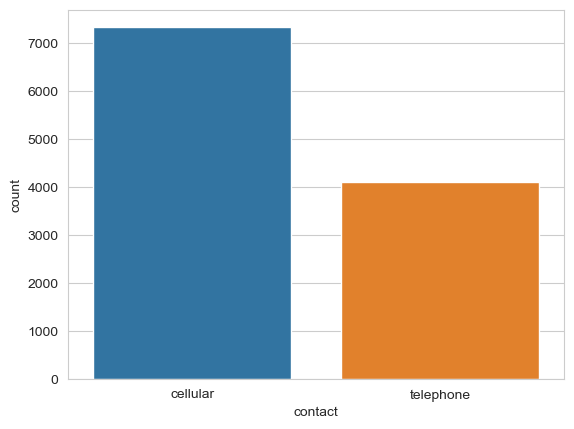

In [28]:
# show frquency of each value in the `contact` column
sns.countplot(data = channel_usage_freq_ranked,
              x= "contact"
              )

# show the graph
plt.show()

The bar graph compares the preferred banking channels used by customers, specifically cellular versus telephone, by counting the contact frequency and ranking the top choice for each customer. Here are the insights and analysis based on the graph:

1. Preference for Cellular Contacts: 
- The bar graph shows that cellular contacts are significantly higher than telephone contacts.
- **This indicates a strong preference among customers for being contacted via their mobile phones**.

2. Customer Accessibility: 
- The higher count for cellular suggests that customers **may find mobile communication more accessible and convenient**, allowing them to respond more quickly and at any location.

3. Marketing Strategy: 
- Given the higher preference for cellular contacts, banking institutions might consider focusing more of their marketing efforts and resources on mobile communication channels.
- **Mobile-specific campaigns, such as SMS marketing or app notifications, might be more effective**.

4. Engagement and Reach: 
- The data suggests that using cellular channels **might result in higher engagement rates**, as more customers prefer this mode of communication.
- Banks could enhance their reach by integrating mobile-first strategies.

## Campaign conversion rate

- Rate at which customers respond yes to marketing campaigns.

- Divide the number of customers who responded yes to a specific marketing campaign by the total number of customers targeted for that campaign.


First find number of unique `customer_id` per `campaign`.

In [29]:
# find unique customer_id per campaign
campaign_unique_cust = df.groupby(["campaign"]).agg({"customer_id":"nunique"})


# properly rename the result column to be `unique_cust_cnt`
campaign_unique_cust = campaign_unique_cust.rename(columns={"customer_id": "unique_cust_cnt"})


# Check first 5 data
campaign_unique_cust.head()

,unique_cust_cnt
campaign,
1,6565
2,4973
3,3153
4,1928
5,1252


Find unique `customer_id` that responded to the campaign, by first finding unique `customer_id` per `campaign` and `y`.

In [30]:
# find unique customer_id per campaign and y
campaign_respond_unique_cust = df.groupby(["campaign", "y"]).agg({"customer_id":"nunique"})

# properly rename the result column to be `unique_respond_cust_cnt`
campaign_respond_unique_cust = campaign_respond_unique_cust.rename(columns={"customer_id": "unique_respond_cust_cnt"})

# Check first 5 data
campaign_respond_unique_cust.head()

unique_respond_cust_cnt
campaign y                           
1        no                      6002
         yes                     1645
2        no                      4580
         yes                      994
3        no                      2915

Combine the 2 DataFrame by merge.

In [31]:
# Merge campaign_respond_unique_cust and campaign_unique_cust by the index
campaign_conv_rate = campaign_respond_unique_cust.merge(campaign_unique_cust, left_index=True, right_index=True)

# Check first 5 data
campaign_conv_rate.head()

unique_respond_cust_cnt  unique_cust_cnt
campaign y                                            
1        no                      6002             6565
         yes                     1645             6565
2        no                      4580             4973
         yes                      994             4973
3        no                      2915             3153

With some Pandas slicing and magic, we can find the campaign conversion rate by **dividing** the  
**Number of unique customer who responded to the campaign** (`responded_customer` from `campaign_respond_unique_cust`)  
with the  
**Total number of customer targeted by each campaign** (`total_customer` from `campaign_unique_cust`).

In [32]:
# Create new DataFrame to keep the old DataFrame save. But only get the rows where `y = yes`
campaign_conv_rate_responded = campaign_conv_rate.loc[(slice(None),"yes"),:].copy()


# rename the columns
campaign_conv_rate_responded.rename(columns={"unique_respond_cust_cnt":"responded_customer",
                                             "unique_cust_cnt":"total_customer"
                                             }, inplace=True)

# get conversion rate
campaign_conv_rate_responded["campaign_conversion_rate"] = campaign_conv_rate_responded["responded_customer"] / campaign_conv_rate_responded["total_customer"]

# show result
campaign_conv_rate_responded.head()

,,responded_customer,total_customer,campaign_conversion_rate
campaign,y,,,
1,yes,1645,6565,0.250571
2,yes,994,4973,0.199879
3,yes,511,3153,0.162068
4,yes,241,1928,0.125000
5,yes,117,1252,0.093450


In [33]:
# Assuming 'campaign_conv_rate_responded' is your DataFrame
data = campaign_conv_rate_responded.reset_index()

fig = make_subplots(rows=2, cols=1, subplot_titles=("Campaign Conversion Rate", "Responded Customers"))

# Create 1st bar plot for campaign conversion rate
fig.add_trace(
    go.Bar(x=data["campaign"], y=data["campaign_conversion_rate"], name="Campaign Conversion Rate"),
    row=1, col=1
)

# Create 2nd bar plot for responded customers
fig.add_trace(
    go.Bar(x=data["campaign"], y=data["responded_customer"], name="Responded Customers"),
    row=2, col=1
)

# Update layout for better spacing and titles
fig.update_layout(height=800, width=1600, title_text="Campaign Performance")

# Show plot
fig.show()

Insights
1. Initial Success: 
- The **initial** campaigns were both **highly effective** (high conversion rates) and had **high engagement** (high number of responded customers). This indicates **successful marketing efforts during the early stages**.
2. Decreasing Effectiveness: 
- The drop in both conversion rates and the number of responded customers in later campaigns suggests a **need to revisit and potentially revamp** the marketing strategy. This could involve targeting new segments, refreshing the campaign content, or adjusting the communication approach.
3. Optimization Opportunities: 
- **Analyzing what made the initial campaigns successful** could provide insights into improving future campaigns. Factors such as campaign content, timing, targeting, and communication channels should be reviewed.
4. Customer Fatigue: 
- The sharp decline in responses might indicate customer fatigue, where **repeated** campaigns have **diminished** returns. This could necessitate a more personalized or varied approach to keep the audience engaged.

Recommendations
1. Review Initial Campaigns: **Study the initial** successful campaigns to understand the key factors that drove high conversion rates and engagement.
2. Diversify Strategies: Implement **varied marketing strategies** for different customer segments to avoid fatigue and increase engagement.
3. Monitor and Adjust: Continuously **monitor** campaign performance and be ready to adjust strategies based on real-time feedback and data.
4. Target New Segments: Consider **expanding** the target audience to include new customer segments that have not been reached by previous campaigns.

## Campaign engagement

- Number of contacts made as part of each marketing campaign.

- Count the number of contacts made for each customer within each marketing campaign in the dataset.

In [34]:
# find number of row per customer_id per campaign and y
campaign_engagement = pd.DataFrame(df.groupby(["customer_id", "campaign"]).size())

# properly rename the result column to be `count`
campaign_engagement.rename(columns={0:"count"}, inplace=True)

# reset index
campaign_engagement.reset_index(inplace=True)

# sort values by `count`
campaign_engagement.sort_values(by="count")

,customer_id,campaign,count
0,17_student_single_basic.9y_unknown_unknown,2,1
13033,44_technician_married_professional.course_unkn...,3,1
13037,44_technician_married_professional.course_yes_no,6,1
13039,44_technician_married_professional.course_yes_no,9,1
13041,44_technician_married_professional.course_yes_yes,2,1
...,...,...,...
5887,34_admin._married_university.degree_no_no,1,40
2986,30_admin._single_university.degree_yes_no,1,43
2973,30_admin._single_university.degree_no_no,1,44
3719,31_admin._single_university.degree_yes_no,1,49


In [35]:
# Assuming 'campaign_engagement' is your DataFrame
campaigns = campaign_engagement['campaign'].unique()

# Create subplots: here, we assume 4 columns and calculate rows dynamically
fig = make_subplots(rows=int(len(campaigns) / 4) + 1, cols=4, 
                    subplot_titles=[f"Campaign {c}" for c in campaigns], shared_xaxes=False)

# Add a box plot for each campaign
for i, campaign in enumerate(campaigns):
    row = int(i / 4) + 1
    col = (i % 4) + 1
    campaign_data = campaign_engagement[campaign_engagement['campaign'] == campaign]
    fig.add_trace(
        go.Box(y=campaign_data['count'], name=f"Campaign {campaign}"),
        row=row, col=col
    )

# Update layout for better spacing and titles
fig.update_layout(height=800, width=1600, title_text="Campaign Engagement")

# Show plot
fig.show()

Analysis
1. Campaign Effectiveness: 
- Campaigns with **higher median engagement counts** and **narrower interquartile ranges** might be more **consistently engaging** to customers (e.g., Campaign 1).
- Campaigns with **broader spreads** and **numerous outliers** might indicate **mixed responses**, where some customers were highly engaged while others were not (e.g., Campaign 2).
2. Consistency in Engagement:
- Campaigns like **Campaign 3** show a **narrow spread and fewer outliers**, indicating **consistent engagement** levels across the customer base.
- In contrast, campaigns like **Campaign 9** display more **variability**, suggesting that the campaign resonated well with **certain segments** but not others.
3. Targeted Improvements:
- Campaigns with **lower median** engagement and **higher variability** could benefit from a review of their strategies. Identifying the factors that led to higher engagement in successful campaigns could inform improvements in less effective campaigns.
4. Customer Segmentation:
- The presence of outliers in campaigns like Campaign 5 indicates that certain customer segments might be **more responsive**. Analyzing these segments could provide insights into targeted marketing efforts.